## Slicing and Indexing DataFrames

In [25]:
from IPython.display import display
import pandas as pd

# Read the CSV file
temperatures = pd.read_csv('../data/temperatures.csv')


## Subsetting rows
value = df.iloc[22, 1]

first_five_rows = df.iloc[:5]
# print(first_five_rows)

columns_3_to_4 = df.iloc[:, 3:5]
# print(columns_3_to_4)

subset = df.iloc[10:20, 2:4]
# print(subset)

## Pivotting tables
temperatures['year'] = pd.to_datetime(temperatures['date']).dt.year
# print(temperatures.head())

temp_by_country_city_vs_year = temperatures.pivot_table(index=['country', 'city'], columns='year', values='avg_temp_c')
subset1 = temp_by_country_city_vs_year.loc['Egypt':'India']
subset2 = temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi')]
subset3 = temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi'), '2005':'2010']

## Calculating on a pivot table
# display(temp_by_country_city_vs_year)

# Filter for the year that had the highest mean temp
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis=0)
display(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis=1)
display(mean_temp_by_city)

lowest_mean_temp_city = mean_temp_by_city.idxmin()
filtered_city_temperatures = temperatures[temperatures['city'] == lowest_mean_temp_city[1]]
display(filtered_city_temperatures)




year
2013    20.312285
dtype: float64

country        city            
Afghanistan    Kabul               15.541955
Angola         Luanda              24.391616
Australia      Melbourne           14.275411
               Sydney              17.799250
Bangladesh     Dhaka               26.174440
                                     ...    
United States  Chicago             11.330825
               Los Angeles         16.675399
               New York            10.911034
Vietnam        Ho Chi Minh City    27.922857
Zimbabwe       Harare              20.699000
Length: 100, dtype: float64

,Unnamed: 0,date,city,country,avg_temp_c,year
5610,5610,2000-01-01,Harbin,China,-20.823,2000
5611,5611,2000-02-01,Harbin,China,-14.946,2000
5612,5612,2000-03-01,Harbin,China,-2.712,2000
5613,5613,2000-04-01,Harbin,China,6.777,2000
5614,5614,2000-05-01,Harbin,China,16.490,2000
...,...,...,...,...,...,...
5770,5770,2013-05-01,Harbin,China,17.606,2013
5771,5771,2013-06-01,Harbin,China,21.392,2013
5772,5772,2013-07-01,Harbin,China,23.783,2013
5773,5773,2013-08-01,Harbin,China,22.322,2013


In [2]:
import pandas as pd

# Sample data
data = {
    'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [32, 75, 30, 78]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='Date', columns='City', values='Temperature')
print("\nPivoted DataFrame:")
print(pivot_df)

# Sample data with multiple entries per date and city
data = {
    'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02', '2021-01-01', '2021-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [32, 75, 30, 78, 31, 77]
}

df = pd.DataFrame(data)
print("\nOriginal DataFrame with multiple entries:")
print(df)

# Pivot table with aggregation
pivot_table_df = df.pivot_table(index='Date', columns='City', values='Temperature', aggfunc='mean')
print("\nPivot Table with mean aggregation:")
print(pivot_table_df)

Original DataFrame:
         Date         City  Temperature
0  2021-01-01     New York           32
1  2021-01-01  Los Angeles           75
2  2021-01-02     New York           30
3  2021-01-02  Los Angeles           78

Pivoted DataFrame:
City        Los Angeles  New York
Date                             
2021-01-01           75        32
2021-01-02           78        30

Original DataFrame with multiple entries:
         Date         City  Temperature
0  2021-01-01     New York           32
1  2021-01-01  Los Angeles           75
2  2021-01-02     New York           30
3  2021-01-02  Los Angeles           78
4  2021-01-01     New York           31
5  2021-01-02  Los Angeles           77

Pivot Table with mean aggregation:
City        Los Angeles  New York
Date                             
2021-01-01         75.0      31.5
2021-01-02         77.5      30.0


## Creating and Visualizing DataFrames

In [11]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

avocados = pd.read_csv('../data/avocados.csv')

display(avocados.head())

avocado_sizes = avocados['size'].value_counts()
display(avocado_sizes)

nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
print(nb_sold_by_size)

# nb_sold_by_size.plot(kind='bar')
# plt.xlabel('Size')
# plt.ylabel('Number of Avocados Sold')
# plt.title('Number of Avocados Sold by Size')
# plt.show()

nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# nb_sold_by_date.plot(kind='line')
# plt.xlabel('Date')
# plt.ylabel('Number of Avocados Sold')
# plt.title('Number of Avocados Sold by Date')
# plt.show()

# avocados.plot.scatter(x='nb_sold', y='avg_price')
# plt.xlabel('Number of Avocados Sold')
# plt.ylabel('Average Price')
# plt.title('Number of Avocados Sold vs. Average Price')
# plt.show()

# # Modify bins to 20
# avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# # Modify bins to 20
# avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# # Add a legend
# plt.legend(["conventional", "organic"])

# # Show the plot
# plt.show()

avocados_2016 = avocados[avocados['date'].str.startswith('2016')]
display(avocados_2016.head())

missing_values = avocados_2016.isnull()
print(missing_values)

missing_summary = avocados_2016.isnull().sum()
print(missing_summary)

# missing_summary.plot(kind='bar')
# plt.xlabel('Variable')
# plt.ylabel('Number of Missing Values')
# plt.title('Missing Values by Variable')
# plt.show()

avocados_complete = avocados_2016.dropna()

missing_values_complete = avocados_complete.isnull().sum()
print(missing_values_complete)

cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Columns with Missing Values')
plt.show()

avocados_filled = avocados_2016.fillna(0)
# avocados_filled[cols_with_missing].hist(bins=30, figsize=(10, 8))
# plt.suptitle('Histograms of Columns with Missing Values (Filled)')
# plt.show()

## Creating DataFrames# List of dictionaries with new data
new_data = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Display the new data
print(new_data)

new_data_df = pd.DataFrame(new_data)
display(new_data_df)

# Dictionary of lists with new data
avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096]
}

# Display the new data dictionary
print(avocados_dict)



,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


size
small          338
large          338
extra_large    338
Name: count, dtype: int64

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64


,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64
date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64


KeyError: "None of [Index(['small_sold', 'large_sold', 'xl_sold'], dtype='object')] are in the [columns]"

## Playground

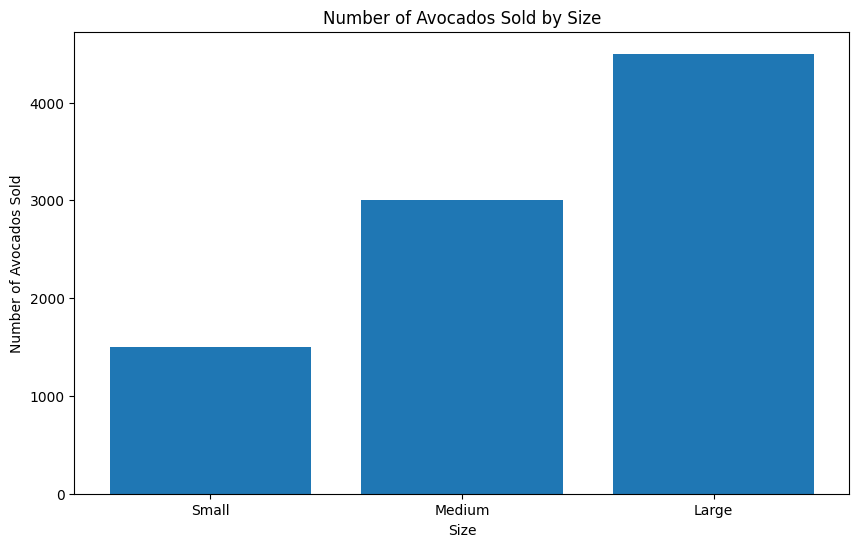

In [32]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# For example, let's create a sample DataFrame
data = {
    'Size': ['Small', 'Medium', 'Large'],
    'Number of Avocados Sold': [1500, 3000, 4500]
}
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Size'], df['Number of Avocados Sold'])

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Number of Avocados Sold')
plt.title('Number of Avocados Sold by Size')

# Display the plot
plt.show()